   # Exploratory Data Analysis - Data Set - Boxing

                                INDEX
                                
1. Problem Statement<br>
2. Data Loading and Description<br>
3. Data Profiling<br>
3.1 Understanding the Dataset<br>
3.2 Pre Profiling<br>
3.3 Preprocessing<br>
3.4 Post Profiling<br>
4. Questions<br>
4.1 What is the largest number of players participated based on the age group from both part of first and second players?
<br>4.2 The maximum number of games conducted between players based on age. here we have taken head of 10. By the graph we can clearly say that 4 matches happend between players(age:17 and 19)?
<br>4.3 Correlation between Age and Numbe of knock outs. Below graph is talking the same. number of Knock outs are increasing when age increases.</b>?
<br>4.4 Below box plot is talking about the range of the age where player wins. First player win's between the age 24 and 30, the second player wins betwen 26 and 32 age ?
<br>4.5 Identify number of wins done by player 1 or 2?
<br>4.6 Find the age of the player who wins more number of games.
5. Conclusions<br>

<b>1. Problem statement</b><br>
I/We are analyzing the given Dataset - Boxing. the goal of this document is to analyze this Dataset and find the relation between columns and find the winning participant. 

<b>2. Data Loading and Description</b><br>
The Dataset contains the information of two participant's with result and decision. <br>
The Dataset has 387427 rows × 26 columns, each column talks about participants of either A or B. Ultimately, we need to identify the possible won's of the participant based on results or decisions. <br>
Find below table which is talking about each column and description.

| Column Name   | Description                                  |
| ------------- |:-------------                               :| 
| Age A/B       | Each player Age                              | 
| Height A/B    | Each player Height                           |  
| Reach         | Each player Reach                            | 
| Stance        | Each player Stance                           |   
| Weight        | Each player Weight                           |
| Won A B       | Each player won                              |
| Lost A B      | Each player Lost                             |
| Draw A B      | Each player Draw                             |
| KOS A B       | Knock out of each Player                     |
| Result        | Result of the Game                           |
| Decision      | Decision of the Game                         |
| Judge         | Score given by each Judge                    |

<b>Importing packages and Dataset</b>

In [1]:
#! pip install seaborn
import pandas as pd
import datetime
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib as mat
import bokeh

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print("Reading Boxing Data")
filePath = "boxing_matches.csv"
print("Current time : ", datetime.datetime.now())
df = pd.read_csv(filePath)
print("Current time : ", datetime.datetime.now())
print("End")

Reading Boxing Data
Current time :  2019-05-31 13:43:37.346134


FileNotFoundError: ignored

<b>3. Data profiling : </b>
<br>3.1 Understanding the DataSet : here we are going to observe each perspective of the data set. 

In [0]:
print("Shape of the data frame : ",df.shape)
print("Columns of the data frame : ",df.columns)

Shape of the data frame :  (387427, 26)
Columns of the data frame :  Index(['age_A', 'age_B', 'height_A', 'height_B', 'reach_A', 'reach_B', 'stance_A', 'stance_B', 'weight_A', 'weight_B', 'won_A', 'won_B', 'lost_A', 'lost_B', 'drawn_A', 'drawn_B', 'kos_A', 'kos_B', 'result', 'decision', 'judge1_A', 'judge1_B', 'judge2_A', 'judge2_B', 'judge3_A', 'judge3_B'], dtype='object')


In [0]:
df.head(5)

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,won_A,won_B,lost_A,lost_B,drawn_A,drawn_B,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,37,49,0,1,0,1,33,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,48,50,1,2,1,1,34,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,23,47,0,1,1,1,13,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,46,31,1,3,1,0,32,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,45,40,1,4,1,0,32,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0


In [0]:
df.tail(5)

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,won_A,won_B,lost_A,lost_B,drawn_A,drawn_B,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
387422,20.0,NaN,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,31,0,0,0,2,0,19,0.0,win_A,KO,NaN,NaN,NaN,NaN,NaN,NaN
387423,20.0,NaN,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,30,2,0,9,2,3,19,2.0,win_A,PTS,NaN,NaN,NaN,NaN,NaN,NaN
387424,20.0,26.0,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,29,7,0,7,2,3,18,3.0,win_A,TKO,NaN,NaN,NaN,NaN,NaN,NaN
387425,20.0,NaN,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,28,0,0,4,2,0,17,0.0,win_A,TKO,NaN,NaN,NaN,NaN,NaN,NaN
387426,20.0,NaN,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,27,0,0,2,2,1,16,0.0,win_A,KO,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387427 entries, 0 to 387426
Data columns (total 26 columns):
age_A       352888 non-null float64
age_B       257935 non-null float64
height_A    249246 non-null float64
height_B    134640 non-null float64
reach_A     112342 non-null float64
reach_B     37873 non-null float64
stance_A    231009 non-null object
stance_B    231009 non-null object
weight_A    135573 non-null float64
weight_B    130358 non-null float64
won_A       387427 non-null int64
won_B       387427 non-null int64
lost_A      387427 non-null int64
lost_B      387427 non-null int64
drawn_A     387427 non-null int64
drawn_B     387427 non-null int64
kos_A       387427 non-null int64
kos_B       387348 non-null float64
result      387427 non-null object
decision    387427 non-null object
judge1_A    52248 non-null float64
judge1_B    52060 non-null float64
judge2_A    70371 non-null float64
judge2_B    70032 non-null float64
judge3_A    61231 non-null float64
judge3_B    6

In [0]:
df.describe()

,age_A,age_B,height_A,height_B,reach_A,reach_B,weight_A,weight_B,won_A,won_B,lost_A,lost_B,drawn_A,drawn_B,kos_A,kos_B,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
count,352888.000000,257935.000000,249246.000000,134640.000000,112342.000000,37873.000000,135573.000000,130358.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387427.000000,387348.000000,52248.000000,52060.000000,70371.000000,70032.000000,61231.000000,61023.000000
mean,24.416041,26.583345,172.786657,172.882657,178.848605,179.001030,146.340636,147.089484,23.108438,15.159080,5.484135,8.610487,2.826481,2.636375,10.338887,6.234735,62.778901,59.509700,59.560941,56.570411,60.784276,57.995215
std,6.523590,11.823224,9.130127,9.430631,12.002404,14.867537,30.240142,30.624890,27.629901,19.938137,8.775672,12.783084,5.584610,5.027003,12.392049,8.750690,30.337580,29.285058,31.021367,30.260935,31.910461,31.170590
min,-74.000000,-74.000000,2.000000,15.000000,5.000000,1.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,23.000000,166.000000,167.000000,170.000000,171.000000,125.000000,126.000000,5.000000,2.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,39.000000,37.000000,39.000000,36.000000,39.000000,36.000000
50%,24.000000,26.000000,173.000000,173.000000,178.000000,178.000000,140.000000,140.000000,14.000000,8.000000,2.000000,5.000000,1.000000,1.000000,6.000000,3.000000,59.000000,54.000000,58.000000,54.000000,58.000000,54.000000
75%,27.000000,30.000000,178.000000,179.000000,185.000000,185.000000,160.000000,160.000000,31.000000,21.000000,7.000000,11.000000,3.000000,3.000000,14.000000,9.000000,80.000000,79.000000,80.000000,75.000000,80.000000,78.000000
max,1818.000000,2016.000000,255.000000,255.000000,456.000000,456.000000,363.000000,450.000000,332.000000,251.000000,208.000000,511.000000,77.000000,76.000000,131.000000,128.000000,540.000000,291.000000,299.000000,294.000000,300.000000,295.000000


In [0]:
df.isnull().sum()

age_A        34539
age_B       129492
height_A    138181
height_B    252787
reach_A     275085
reach_B     349554
stance_A    156418
stance_B    156418
weight_A    251854
weight_B    257069
won_A            0
won_B            0
lost_A           0
lost_B           0
drawn_A          0
drawn_B          0
kos_A            0
kos_B           79
result           0
decision         0
judge1_A    335179
judge1_B    335367
judge2_A    317056
judge2_B    317395
judge3_A    326196
judge3_B    326404
dtype: int64

From above data we can identify that age_A, B has null values where these are mandatory columns which reflect the result.

<b>3. Data profiling : </b>
<br>3.2 Pre Profiling
<br>We did a preprofling and identified that judge1_B/2A/2B/3A/3B has most correlation with judge1A and weightB with weightA so that we are going to remove these columns. 

In [0]:
print("Lets delete column : judge*_*, weight_B - since these columns has more correlation")
print("Columns before removing : ")
print(df.columns)
df.drop('judge1_B', axis=1, inplace=True)             # Drop judge1_B and modify the dataframe
df.drop('judge2_A', axis=1, inplace=True)
df.drop('judge2_B', axis=1, inplace=True)
df.drop('judge3_A', axis=1, inplace=True)
df.drop('judge3_B', axis=1, inplace=True)
df.drop('weight_B', axis=1, inplace=True)
print(df.columns)

Lets delete column : judge*_*, weight_B - since these columns has more correlation
Columns before removing : 
Index(['age_A', 'age_B', 'height_A', 'height_B', 'reach_A', 'reach_B', 'stance_A', 'stance_B', 'weight_A', 'weight_B', 'won_A', 'won_B', 'lost_A', 'lost_B', 'drawn_A', 'drawn_B', 'kos_A', 'kos_B', 'result', 'decision', 'judge1_A', 'judge1_B', 'judge2_A', 'judge2_B', 'judge3_A', 'judge3_B'], dtype='object')
Index(['age_A', 'age_B', 'height_A', 'height_B', 'reach_A', 'reach_B', 'stance_A', 'stance_B', 'weight_A', 'won_A', 'won_B', 'lost_A', 'lost_B', 'drawn_A', 'drawn_B', 'kos_A', 'kos_B', 'result', 'decision', 'judge1_A'], dtype='object')


<b>Dropping few rows based on columns since these has more number of Nulls.</b>

In [0]:
print("Count of the Rows : before removing NaN of age_A")
print(df["age_A"].count())
print("Start")
df.dropna(subset = ["age_A"], axis=0, inplace=True)
print("End")
print("Count of the Rows : after removing NaN of age_A")
print(df["age_A"].count())

print("Count of the Rows : before removing NaN of age_B")
print(df["age_B"].count())
print("Start")
df.dropna(subset = ["age_B"], axis=0, inplace=True)
print("End")
print("Count of the Rows : after removing NaN of age_B")
print(df["age_B"].count())


print("Count of the Rows : before removing NaN of height_A")
print(df["height_A"].count())
print("Start")
df.dropna(subset = ["height_A"], axis=0, inplace=True)
print("End")
print("Count of the Rows : after removing NaN of height_A")
print(df["height_A"].count())


print("Count of the Rows : before removing NaN of height_B")
print(df["height_B"].count())
print("Start")
df.dropna(subset = ["height_B"], axis=0, inplace=True)
print("End")
print("Count of the Rows : after removing NaN of height_B")
print(df["height_B"].count())

print("Count of the Rows : before removing NaN of reach_A")
print(df["reach_A"].count())
print("Start")
df.dropna(subset = ["reach_A"], axis=0, inplace=True)
print("End")
print("Count of the Rows : after removing NaN of reach_A")
print(df["reach_A"].count())


print("Count of the Rows : before removing NaN of reach_B")
print(df["reach_B"].count())
print("Start")
df.dropna(subset = ["reach_B"], axis=0, inplace=True)
print("End")
print("Count of the Rows : after removing NaN of reach_B")
print(df["reach_B"].count())

print("Count of the Rows : before removing NaN of judge1_A")
print(df["judge1_A"].count())
print("Start")
df.dropna(subset = ["judge1_A"], axis=0, inplace=True)
print("End")
print("Count of the Rows : after removing NaN of judge1_A")
print(df["judge1_A"].count())

Count of the Rows : before removing NaN of age_A
352888
Start
End
Count of the Rows : after removing NaN of age_A
352888
Count of the Rows : before removing NaN of age_B
241695
Start
End
Count of the Rows : after removing NaN of age_B
241695
Count of the Rows : before removing NaN of height_A
170682
Start
End
Count of the Rows : after removing NaN of height_A
170682
Count of the Rows : before removing NaN of height_B
98803
Start
End
Count of the Rows : after removing NaN of height_B
98803
Count of the Rows : before removing NaN of reach_A
48752
Start
End
Count of the Rows : after removing NaN of reach_A
48752
Count of the Rows : before removing NaN of reach_B
21135
Start
End
Count of the Rows : after removing NaN of reach_B
21135
Count of the Rows : before removing NaN of judge1_A
7821
Start
End
Count of the Rows : after removing NaN of judge1_A
7821


<b>Converting age_A, age_B and kos_B to Intiger for easier way of anlysis and all these should be intiger(and same as both)

In [0]:
print("Converting age_A and age_B to int for easier analysis")
df["age_A"]=df["age_A"].astype("int")
df["age_B"]=df["age_B"].astype("int")
df["kos_B"]=df["kos_B"].astype("int")
print("Convert is in place now")

Converting age_A and age_B to int for easier analysis
Convert is in place now


<b>We are going to consider the Age of A and B is between 16 and 38 since this is required for International games. remaining rows are removing since those are in outer range.</b>

In [0]:
print("Start")
df.drop(df[(df.age_A < 16) | (df.age_A > 38) | (df.age_B < 16) | (df.age_B > 38)].index, inplace=True)
print("End")

Start
End


In [0]:
df.dtypes

age_A         int32
age_B         int32
height_A    float64
height_B    float64
reach_A     float64
reach_B     float64
stance_A     object
stance_B     object
weight_A    float64
won_A         int64
won_B         int64
lost_A        int64
lost_B        int64
drawn_A       int64
drawn_B       int64
kos_A         int64
kos_B         int32
result       object
decision     object
judge1_A    float64
dtype: object

In [0]:
df

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,won_A,won_B,lost_A,lost_B,drawn_A,drawn_B,kos_A,kos_B,result,decision,judge1_A
0,35,27,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,37,49,0,1,0,1,33,34,draw,SD,110.0
1,26,31,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,48,50,1,2,1,1,34,32,win_A,UD,120.0
3,25,29,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,46,31,1,3,1,0,32,19,win_A,KO,47.0
4,25,35,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,45,40,1,4,1,0,32,33,win_A,UD,118.0
6,23,31,175.0,175.0,179.0,188.0,orthodox,orthodox,155.0,43,19,1,1,1,2,31,12,win_A,SD,115.0
7,23,31,175.0,177.0,179.0,175.0,orthodox,orthodox,155.0,42,22,1,3,1,0,30,18,win_A,TKO,89.0
8,36,23,173.0,175.0,183.0,179.0,orthodox,orthodox,152.0,44,42,0,0,0,1,26,30,win_A,MD,116.0
9,27,22,177.0,175.0,183.0,179.0,southpaw,southpaw,NaN,26,41,0,0,0,1,14,30,win_B,UD,112.0
12,21,32,175.0,180.0,179.0,188.0,orthodox,orthodox,154.0,38,33,0,4,1,1,28,28,win_A,TKO,40.0
13,21,30,175.0,175.0,179.0,175.0,orthodox,orthodox,NaN,37,23,0,4,1,2,27,12,win_A,TKO,50.0


<b>4. Questions</b>

<b>4.1 What is the largest number of players participated based on the age group from both part of first and second.</b>

Text(0.5, 1.0, 'Count plot for Participant Age A.')

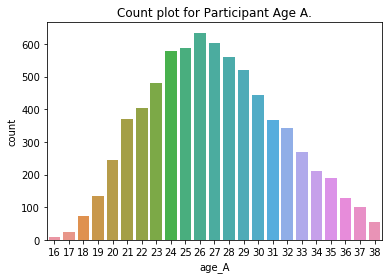

In [0]:
sns.countplot(x='age_A', data=df).set_title('Count plot for Participant Age A.')

Text(0.5, 1.0, 'Count plot for Participant Age B.')

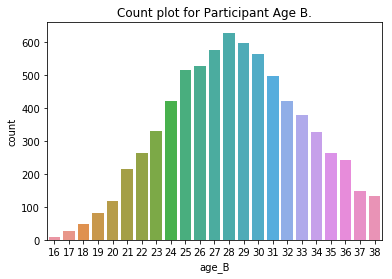

In [0]:
sns.countplot(x='age_B', data=df).set_title('Count plot for Participant Age B.')

<b>4.2 The maximum number of games conducted between players based on age. here we have taken head of 10. By the graph we can clearly say that 4 matches happend between players(age:17 and 19)</b>

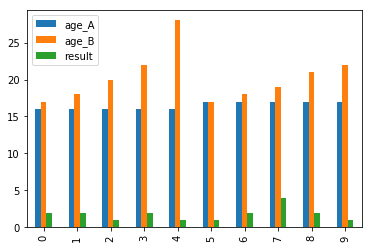

In [0]:
df_gptest = df[['age_A','age_B','result']]
grouped_test1 = df_gptest.groupby(['age_A','age_B'],as_index=False).count()
grouped_test1.head(10).plot.bar()

In [0]:
grouped_test1.head(10)

,age_A,age_B,result
0,16,17,2
1,16,18,2
2,16,20,1
3,16,22,2
4,16,28,1
5,17,17,1
6,17,18,2
7,17,19,4
8,17,21,2
9,17,22,1


<b>4.3 Correlation between Age and Numbe of knock outs. Below graph is talking the same. number of Knock outs are increasing when age increases.</b>

          age_A     kos_A
age_A  1.000000  0.471982
kos_A  0.471982  1.000000


(0, 87.17467893755664)

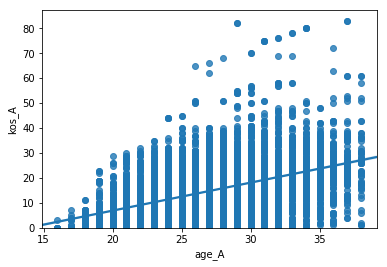

In [0]:
print(df[["age_A", "kos_A"]].corr())
sns.regplot(x="age_A", y="kos_A", data=df)
plt.ylim(0,)

<b>4.4 Below box plot is talking about the range of the age where player wins. First player win's between the age 24 and 30, the second player wins betwen 26 and 32 age
.</b>

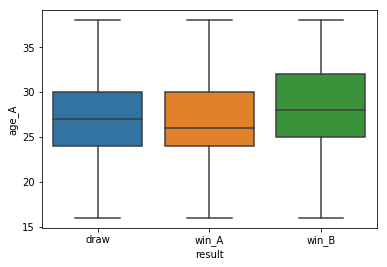

In [0]:
sns.boxplot(x="result", y="age_A", data=df)

<b>4.5 Identify number of wins acquired by player 1 or 2</b>

Text(0.5, 1.0, 'Number of Wins - A or B')

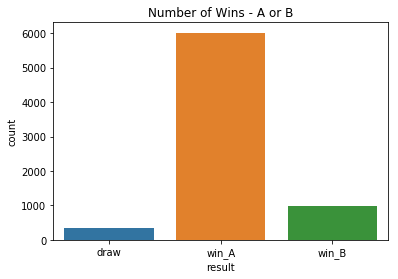

In [0]:
sns.countplot(x='result', data=df).set_title('Number of Wins - A or B')

C:\Users\hexa\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Factor plot for the player 1 and 2')

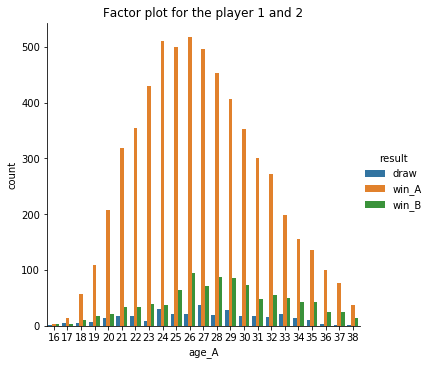

In [0]:
sns.factorplot('age_A', hue='result', kind='count', data=df);
plt.title('Factor plot for the player 1 and 2')

<b>4.6 Find the age of the player who wins more number of games.</b>

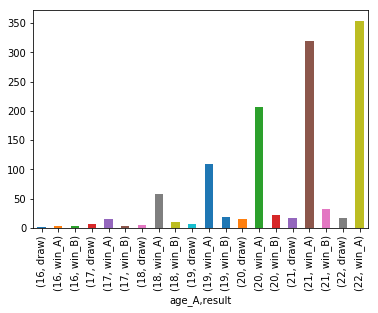

In [0]:
df.groupby(['age_A','result'])['age_A'].count().head(20).plot.bar(stacked=True)

In [0]:
df.groupby(['age_A','result'])['age_A'].count().head(20)

age_A  result
16     draw        2
       win_A       3
       win_B       3
17     draw        6
       win_A      15
       win_B       3
18     draw        5
       win_A      58
       win_B      10
19     draw        7
       win_A     109
       win_B      18
20     draw       15
       win_A     207
       win_B      22
21     draw       17
       win_A     319
       win_B      33
22     draw       17
       win_A     354
Name: age_A, dtype: int64

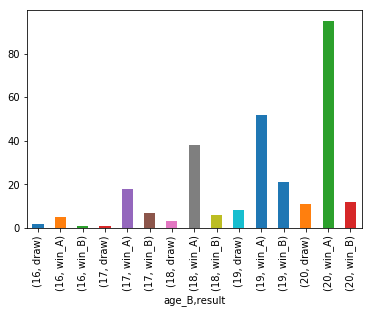

In [0]:
df.groupby(['age_B','result'])['age_B'].count().head(15).plot.bar(stacked=True)

<b>5 Conclusions</b>
<br> By analyzing provided data after profiling we can confirm that the second player played well but the first player won many games and his performance is good in the perspective of scores and knocks outs.

In [0]:
df

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,won_A,won_B,lost_A,lost_B,drawn_A,drawn_B,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,37,49,0,1,0,1,33,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,48,50,1,2,1,1,34,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,23,47,0,1,1,1,13,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,46,31,1,3,1,0,32,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,45,40,1,4,1,0,32,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0
5,24.0,31.0,175.0,175.0,179.0,178.0,orthodox,orthodox,NaN,NaN,44,32,1,1,1,0,31,28.0,win_A,KO,NaN,NaN,NaN,NaN,NaN,NaN
6,23.0,31.0,175.0,175.0,179.0,188.0,orthodox,orthodox,155.0,155.0,43,19,1,1,1,2,31,12.0,win_A,SD,115.0,113.0,117.0,111.0,113.0,115.0
7,23.0,31.0,175.0,177.0,179.0,175.0,orthodox,orthodox,155.0,NaN,42,22,1,3,1,0,30,18.0,win_A,TKO,89.0,82.0,88.0,83.0,89.0,82.0
8,36.0,23.0,173.0,175.0,183.0,179.0,orthodox,orthodox,152.0,NaN,44,42,0,0,0,1,26,30.0,win_A,MD,116.0,112.0,114.0,114.0,117.0,111.0
9,27.0,22.0,177.0,175.0,183.0,179.0,southpaw,southpaw,NaN,NaN,26,41,0,0,0,1,14,30.0,win_B,UD,112.0,115.0,109.0,118.0,111.0,116.0
